# Task-2  Question-2

## To Explore Unsupervised Machine Learning: K-Means Clustering
In this task we will use the ‘Iris’ dataset, to predict the optimum number of clusters.

The Iris dataset contains the data for 50 flowers from each of the 3 species - Setosa, Versicolor and Virginica. The data gives the measurements in centimeters of the variables sepal length and width and petal length and width for each of the flowers. 

Goal of the study is to perform exploratory analysis on the data and build a K-means clustering model to cluster them into groups. Here we have assumed we do not have the species column to form clusters and then used it to check our model performance.

### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

### Loading Iris Dataset

In [40]:
iris=datasets.load_iris()
Dataset=pd.DataFrame(iris.data,columns=iris.feature_names)
Dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Preparing the dataset

In [41]:
x = Dataset.iloc[:, [0, 1, 2, 3]].values

### Finding the minimum no. of clusters using elbow method

In [43]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np

In [44]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(x) 
    kmeanModel.fit(x)     
      
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [45]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 1.9440683605553906
2 : 0.8555777695266533
3 : 0.6480304904934435
4 : 0.5573847727333312
5 : 0.5087764081462801
6 : 0.46619760937409516
7 : 0.44082116404559013
8 : 0.411796561194384
9 : 0.4019210859068916


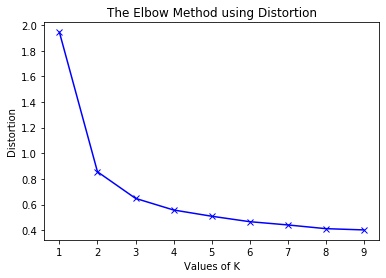

In [46]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

### So,the elbow shape occurs at cluster no.=3

### Finding the Clusters using Kmean

In [48]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)

In [50]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualization of dataset and scatter plot of clusters

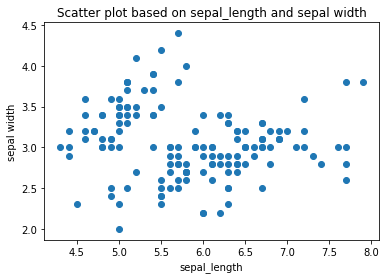

In [51]:
plt.scatter(x[:,0],x[:,1])
plt.title('Scatter plot based on sepal_length and sepal width')
plt.xlabel('sepal_length')
plt.ylabel('sepal width')
plt.show()

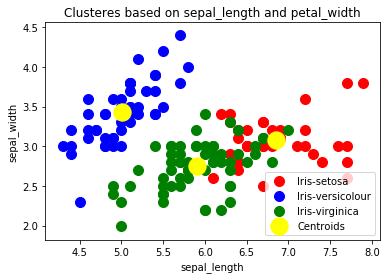

In [52]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusteres based on sepal_length and petal_width')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

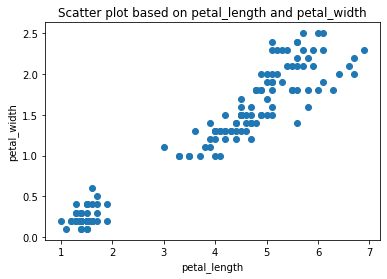

In [53]:
plt.scatter(x[:,2],x[:,3])
plt.title('Scatter plot based on petal_length and petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

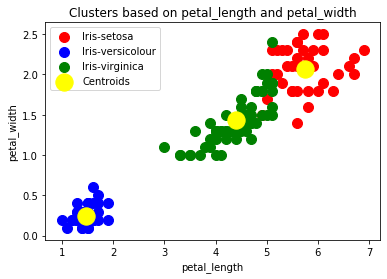

In [54]:
plt.scatter(x[y_kmeans==0, 2], x[y_kmeans==0, 3], s=100, c='red', label ='Iris-setosa')
plt.scatter(x[y_kmeans==1, 2], x[y_kmeans==1, 3], s=100, c='blue', label ='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 2], x[y_kmeans==2, 3], s=100, c='green', label ='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters based on petal_length and petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()